In [2]:
import os
import re
import random
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
def ReadFile():
    path_to_file = os.path.realpath('.')
    n=0
    with open(os.path.join(path_to_file, 'simple_english_wiki.txt'), 'r') as file:
        for line in file:
            for char in line:
                if re.findall('([A-Z a-z0-9])', char):
                    n += 1
    return n

In [4]:
# Count the total number of words in the file for the probablity of words length
def countWords(file):
   path_to_file = os.path.realpath('.')
   total_words = 0
   words = []
   with open(os.path.join(path_to_file, file), 'r') as file:
       for line in file:
          total_words += len(re.findall(r'\w+', line)) # total number of words
          words += re.findall(r'\w+', line) # words each time
   return words, total_words # returning the words and total number of words

# calculate the probability of Characters
def probabilitiyCharacters():
    occurrences = {}
    d = {}
    alpha = list('0123456789abcdefghijklmnopqrstuvwxyz') # list to get the probability for these characters
    whole_file = open('simple_english_wiki.txt', 'r+').read() # read the file
    low_letters = whole_file.lower() # convert it to lower cast as described in assignemnt
    letters= list(low_letters) # make a list of all the characters
    n = len(letters) # total number of characters
    f = float(n)
    for x in alpha:
        occurrences[x] = letters.count(x) # number of occurances of character in list
        d[x] = (occurrences[x]) / f # probablity of characters
    for x in occurrences:
        print x, occurrences[x], d[x]
    return d

In [5]:
# Calculate the probability of Words length which we need to draw later and also for generating the text file
def probabilityWordsLength(file_name):
    #file_name = 'simple_english_wiki.txt'
    occurrences = {}
    d = {}
    whole_file = open(file_name, 'r+').read()
    low_letters = whole_file.lower()
    listz = list(map(len, low_letters.split()))
    words, total = countWords(file_name)
    n = float(total)
    f = Counter(listz)
    for key, value in f.items():
        occurrences[key] = value
        d[key] = value/n
    for x in occurrences:
        print x, occurrences[x], d[x]
    return d

In [6]:

# Generate the text using the probability of characters and probability of words length
def makeGibberish(prob_c,prob_w):
    i = 0
    j = 0
    write_words = ''
    numd = 5000 #Total number of words mentioned in Assignment
    while i < numd: # loop for generating the 5000 words
        new_word = ''
        i += 1
        rand = random.random() # random number to select the word length from probablity
        key, value = min(prob_w.items(), key=lambda (_, v): abs(v - rand)) # find the word length that is nearest to the random number
        j = 0
        while j < key: # loop for generating word length equal to the word length found from the previous step
            j +=1
            randi = random.random()# random number to select the character from probablity
            keyi, valuei = min(prob_c.items(), key=lambda (_, v): abs(v - randi)) # find the character that is nearest to the random number
            new_word += keyi # add the character to the word
        write_words += ' ' + new_word # add the word to the whole text
    return write_words


1 5 0.00326583932071
0 12 0.00783801436969
3 2 0.00130633572828
2 6 0.00391900718485
5 3 0.00195950359242
4 1 0.000653167864141
7 1 0.000653167864141
6 1 0.000653167864141
9 1 0.000653167864141
8 1 0.000653167864141
a 104 0.0679294578707
c 33 0.0215545395167
b 9 0.00587851077727
e 169 0.11038536904
d 54 0.0352710646636
g 33 0.0215545395167
f 11 0.00718484650555
i 129 0.0842586544742
h 68 0.0444154147616
k 19 0.0124101894187
j 1 0.000653167864141
m 32 0.0209013716525
l 70 0.0457217504899
o 51 0.0333115610712
n 84 0.0548661005879
q 0 0.0
p 38 0.0248203788374
s 94 0.0613977792293
r 64 0.041802743305
u 22 0.0143696930111
t 85 0.055519268452
w 29 0.0189418680601
v 5 0.00326583932071
y 15 0.00979751796212
x 2 0.00130633572828
z 0 0.0
1 3 0.0121457489879
2 30 0.121457489879
3 44 0.178137651822
4 34 0.137651821862
5 27 0.109311740891
6 20 0.080971659919
7 34 0.137651821862
8 18 0.0728744939271
9 19 0.0769230769231
10 12 0.0485829959514
13 1 0.00404858299595
16 1 0.00404858299595
1 106 0.0212
2

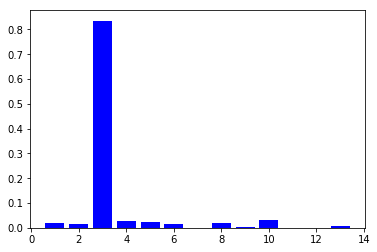

1 3 0.0121457489879
2 30 0.121457489879
3 44 0.178137651822
4 34 0.137651821862
5 27 0.109311740891
6 20 0.080971659919
7 34 0.137651821862
8 18 0.0728744939271
9 19 0.0769230769231
10 12 0.0485829959514
13 1 0.00404858299595
16 1 0.00404858299595


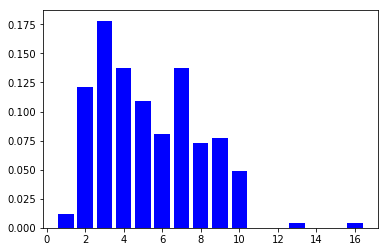

In [7]:

# save file
def saveFile(words, file_name):
   path_to_file = os.path.realpath('.')
   with open(os.path.join(path_to_file, file_name+'.txt'), 'w') as file_to_write:
       file_to_write.write(words)
       file_to_write.close()

# Task 1 from assignment
def task1():
    #b , c = countWords('simple_english_wiki.txt')
    prob_c = probabilitiyCharacters()
    prob_w = probabilityWordsLength('simple_english_wiki.txt')
    generated_text = makeGibberish(prob_c,prob_w)
    saveFile(generated_text,"new_generated_text")

# Task 2 from assignment
def task2():
    probability_words_length_generated = probabilityWordsLength("new_generated_text.txt")
    plt.bar(probability_words_length_generated.keys(), probability_words_length_generated.values(), color='b')
    plt.show()
    probability_words_length_original = probabilityWordsLength("simple_english_wiki.txt")
    plt.bar(probability_words_length_original.keys(), probability_words_length_original.values(), color='b')
    plt.show()


def main():
    task1()
    task2()


if __name__ == "__main__":
   main()
